In [2]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('911.csv')
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


# How many rows and columns does the dataset have?

In [4]:
df.shape

(663522, 9)

# Which features are categorical?

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        663522 non-null  float64
 1   lng        663522 non-null  float64
 2   desc       663522 non-null  object 
 3   zip        583323 non-null  float64
 4   title      663522 non-null  object 
 5   timeStamp  663522 non-null  object 
 6   twp        663229 non-null  object 
 7   addr       663522 non-null  object 
 8   e          663522 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 45.6+ MB


# How many zip codes does the dataset have?

In [6]:
df['zip'].nunique()

204

# What are the top 5 zip codes for 911 calls?

In [7]:
df['zip'].value_counts().head(5)

19401.0    45606
19464.0    43910
19403.0    34888
19446.0    32270
19406.0    22464
Name: zip, dtype: int64

# What are the top 5 townships (twp) for 911 calls?

In [8]:
df['twp'].value_counts().head(5)

LOWER MERION    55490
ABINGTON        39947
NORRISTOWN      37633
UPPER MERION    36010
CHELTENHAM      30574
Name: twp, dtype: int64

# How many unique title of emergency codes are there?

In [9]:
df['title'].nunique()

148

# Which features contain blank, null or empty values?

In [10]:
df.isnull().sum()

lat              0
lng              0
desc             0
zip          80199
title            0
timeStamp        0
twp            293
addr             0
e                0
dtype: int64

# What is the most common Reason for a 911 call based off of this new column?

In [11]:
df['reason'] = df['title'].apply(lambda title: title.split(':')[0])

In [12]:
df = df.drop('e',axis=1)

In [13]:
df['title_code'] = df['title'].apply(lambda title: title.split(':')[1])

In [14]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,reason,title_code
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,EMS,BACK PAINS/INJURY
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,EMS,DIABETIC EMERGENCY
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,Fire,GAS-ODOR/LEAK
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,EMS,CARDIAC EMERGENCY
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,EMS,DIZZINESS


In [15]:
df1 = df['reason'].value_counts().reset_index()

In [16]:
df1 = df1.rename(columns={'index' : 'reason', 'reason' : 'count'})

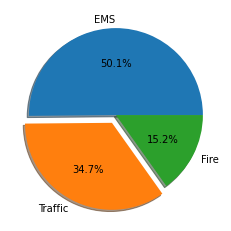

In [17]:
plt.pie(df1['count'], explode=(0, 0.1, 0), labels = df1['reason'], shadow=True, autopct='%1.1f%%')
plt.show()

##### The barcahrt shows the top 10 emergency calls from all the categories.

In [18]:
df2 = df['title'].value_counts().head(10).reset_index()

In [19]:
df2

,index,title
0,Traffic: VEHICLE ACCIDENT -,148372
1,Traffic: DISABLED VEHICLE -,47909
2,Fire: FIRE ALARM,38336
3,EMS: FALL VICTIM,34676
4,EMS: RESPIRATORY EMERGENCY,34248
5,EMS: CARDIAC EMERGENCY,32332
6,EMS: VEHICLE ACCIDENT,25513
7,Traffic: ROAD OBSTRUCTION -,23235
8,EMS: SUBJECT IN PAIN,19646
9,EMS: HEAD INJURY,18301


In [20]:
df2 = df2.rename(columns={'index' : 'title', 'title' : 'count'})

In [21]:
df2 = df2.sort_values('count')

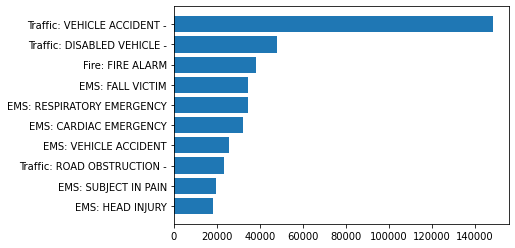

In [23]:
plt.barh(df2['title'], df2['count'])
plt.show()

#### Traffic 911 Emergency Calls

In [25]:
df3 = df[df['reason'] == 'Traffic'].groupby('title_code').count()['lat'].sort_values(ascending=True).reset_index()

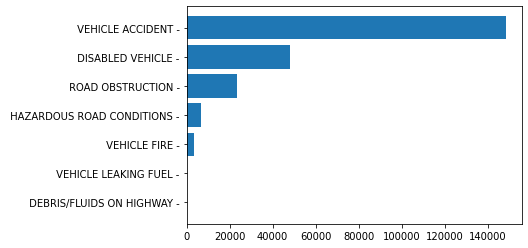

In [28]:
plt.barh(df3['title_code'], df3['lat'])
plt.show()

##### Fire 911 Emergency Calls

In [29]:
df4 = df[df['reason'] == 'Fire'].groupby('title_code').count()['lat'].sort_values(ascending=True).reset_index().tail(10)

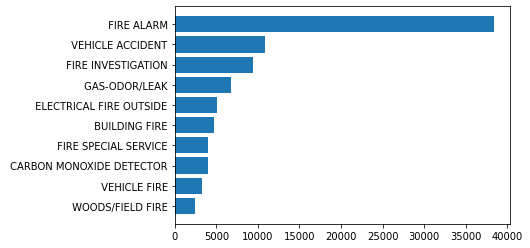

In [30]:
plt.barh(df4['title_code'], df4['lat'])
plt.show()

##### EMS 911 Emergency Calls

In [31]:
df5 = df[df['reason'] == 'Fire'].groupby('title_code').count()['lat'].sort_values(ascending=True).reset_index().tail(10)

In [32]:
df5

,title_code,lat
50,WOODS/FIELD FIRE,2486
51,VEHICLE FIRE,3232
52,CARBON MONOXIDE DETECTOR,3990
53,FIRE SPECIAL SERVICE,4050
54,BUILDING FIRE,4754
55,ELECTRICAL FIRE OUTSIDE,5111
56,GAS-ODOR/LEAK,6740
57,FIRE INVESTIGATION,9444
58,VEHICLE ACCIDENT,10864
59,FIRE ALARM,38336


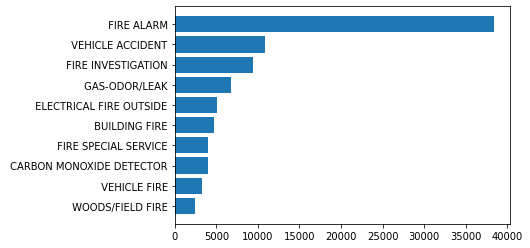

In [33]:
plt.barh(df5['title_code'], df5['lat'])
plt.show()

In [34]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [35]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,reason,title_code
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,EMS,BACK PAINS/INJURY
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,EMS,DIABETIC EMERGENCY
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,Fire,GAS-ODOR/LEAK
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,EMS,CARDIAC EMERGENCY
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,EMS,DIZZINESS


In [36]:
df['Year'] = df['timeStamp'].apply(lambda time: time.year)
df['Month'] = df['timeStamp'].apply(lambda time: time.month)
df['Day of Week'] = df['timeStamp'].apply(lambda time: time.dayofweek)

In [37]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,reason,title_code,Year,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,EMS,BACK PAINS/INJURY,2015,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,EMS,DIABETIC EMERGENCY,2015,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,Fire,GAS-ODOR/LEAK,2015,12,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,EMS,CARDIAC EMERGENCY,2015,12,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,EMS,DIZZINESS,2015,12,3


In [38]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

df['Day of Week'] = df['Day of Week'].map(dmap)

In [39]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,reason,title_code,Year,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,EMS,BACK PAINS/INJURY,2015,12,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,EMS,DIABETIC EMERGENCY,2015,12,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,Fire,GAS-ODOR/LEAK,2015,12,Thu
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,EMS,CARDIAC EMERGENCY,2015,12,Thu
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,EMS,DIZZINESS,2015,12,Thu


##### Weekly and monthly calls

In [40]:
df6 = df['Day of Week'].value_counts().reset_index()
df6 = df6.rename(columns={'index' : 'Day of Week', 'Day of Week' : 'count'})
df6 = df6.sort_values('count')
df6

,Day of Week,count
6,Sun,78859
5,Sat,89452
4,Mon,96745
3,Tue,97684
2,Thu,98683
1,Wed,99157
0,Fri,102942


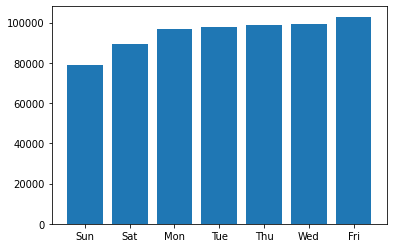

In [50]:
plt.bar(df6['Day of Week'], df6['count'])
plt.show()

In [44]:
df7 = df['Month'].value_counts().reset_index()
df7 = df7.rename(columns={'index' : 'Month', 'Month' : 'count'})

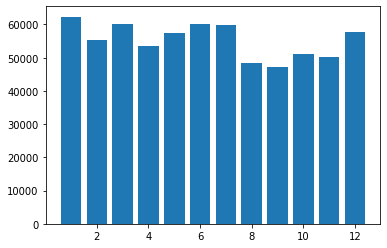

In [48]:
plt.bar(df7['Month'], df7['count'])
plt.show()

##### Yearly Calls

In [46]:
df8 = df['Year'].value_counts().reset_index()
df8 = df8.rename(columns={'index' : 'Year', 'Year' : 'count'})

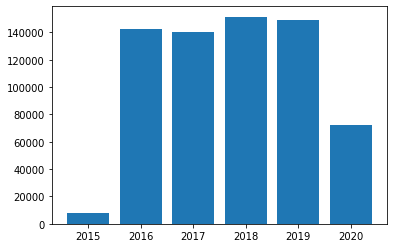

In [49]:
plt.bar(df8['Year'], df8['count'])
plt.show()